In [29]:
import librosa
import numpy as np

In [30]:
def preprocess_audio(audio_path, target_sampling_rate=44100, frame_size=2048, hop_size=512):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Resample to the target sampling rate
    y = librosa.resample(y, orig_sr=sr, target_sr=target_sampling_rate)
    sr = target_sampling_rate

    # Normalize audio data to the range [-1, 1]
    y_normalized = librosa.util.normalize(y)

    # Frame segmentation with overlapping frames
    frames = librosa.util.frame(y_normalized, frame_length=frame_size, hop_length=hop_size)

    return frames

# Example usage
audio_path = 'C:/Users/apurv/CF_Chirp.wav'
target_sampling_rate = 44100  # or 48000, depending on your choice
frame_size = 2048
hop_size = 512

preprocessed_data_CF_Chirp = preprocess_audio(audio_path, target_sampling_rate, frame_size, hop_size)


Shape of preprocessed data: (2048, 427)


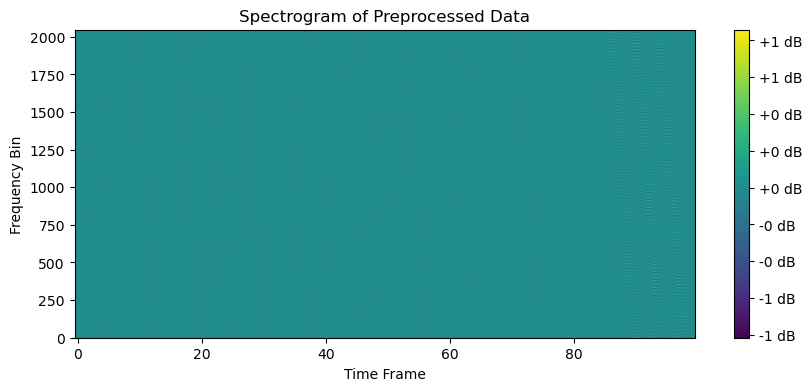

In [31]:
import matplotlib.pyplot as plt

# Print the shape of the preprocessed data
print("Shape of preprocessed data:", preprocessed_data_CF_Chirp.shape)

# Visualize the first few frames
plt.figure(figsize=(10, 4))
plt.imshow(preprocessed_data[:, :100], cmap='viridis', origin='lower', aspect='auto')
plt.title('Spectrogram of Preprocessed Data')
plt.xlabel('Time Frame')
plt.ylabel('Frequency Bin')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [32]:
#If you want to save the preprocessed data to a file, you can use NumPy's save function:
np.save('preprocessed_data_CF_Chirp.npy', preprocessed_data)


In [20]:
#Later, you can load the saved data using:
loaded_data = np.load('preprocessed_data.npy')


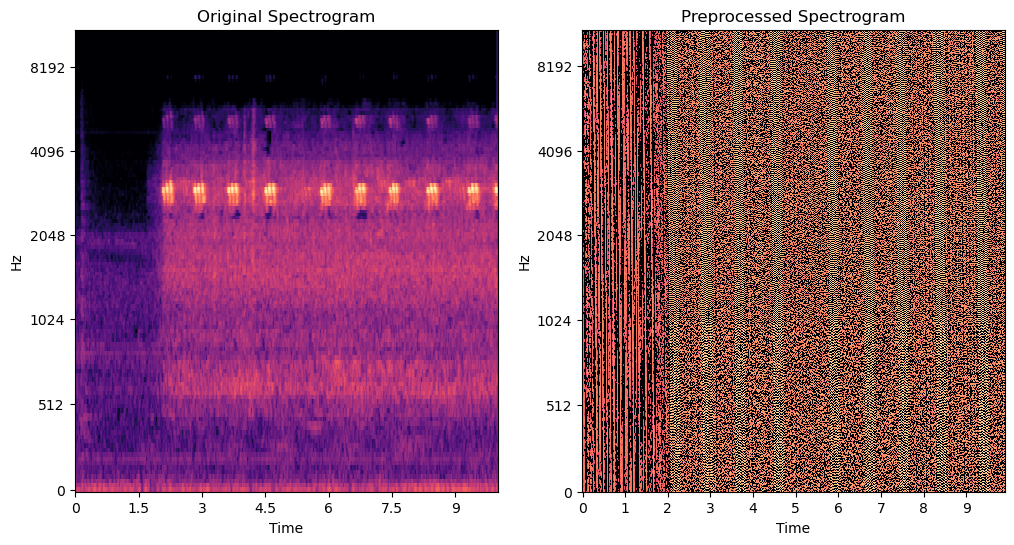

In [37]:
import librosa.display

# Load original audio for comparison
original_audio, original_sr = librosa.load('C:/Users/apurv/CF_Chirp.wav', sr=None)
original_spectrogram = librosa.feature.melspectrogram(y=original_audio, sr=original_sr)

# Visualize both spectrograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.power_to_db(original_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.title('Original Spectrogram')

plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.power_to_db(preprocessed_data, ref=np.max), y_axis='mel', x_axis='time')
plt.title('Preprocessed Spectrogram')

plt.show()



In [39]:
import numpy as np
import librosa

# Assume 'data' is the raw audio signal
sampling_rate = 44100
chirp_duration = 5  # seconds

# Segment the audio data into frames
frame_size = 1024
hop_size = 512
data = 'C:/Users/apurv/CF_Chirp.wav'
frames = librosa.util.frame(data, frame_length=frame_size, hop_length=hop_size).T

# Extract features (e.g., using Short-Time Fourier Transform)
spectrogram = np.abs(librosa.stft(data, n_fft=frame_size, hop_length=hop_size))

# Normalize the spectrogram
normalized_spectrogram = (spectrogram - np.min(spectrogram)) / (np.max(spectrogram) - np.min(spectrogram))


IndexError: tuple index out of range